<a href="https://colab.research.google.com/github/MRazin172/Speech_Processing/blob/main/2348534_SPR_LabProgram2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the sine wave
f = 5       # Frequency of the sine wave (Hz)
fs = 1000   # Sampling frequency (Hz)
duration = 1  # Duration of the signal in seconds

# Generate the time vector and sine wave signal
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
sin_wave = np.sin(2 * np.pi * f * t)

# Display basic information
print(f"Generated a {f} Hz sine wave sampled at {fs} Hz")


Generated a 5 Hz sine wave sampled at 1000 Hz


here i have generated a 5 Hz sine wave sampled at 1000 Hz. this means that the signal has 5 oscillations per second and it is sampled at 1000hz

thus will have 200 samples per cycle
 it means that within each cycle of the 5 Hz sine wave, you are taking 200 samples (1000 samples divided by 5 Hz = 200 samples per cycle).

Plotting the generated signal

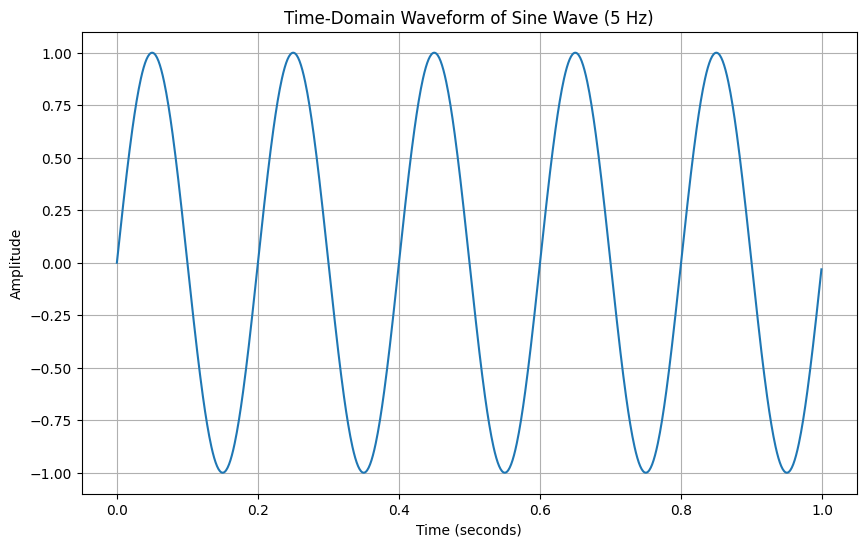

In [2]:
# Plot the sine wave in time domain
plt.figure(figsize=(10, 6))
plt.plot(t, sin_wave)
plt.title('Time-Domain Waveform of Sine Wave (5 Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


<ipython-input-18-a24b7a5b6027>:37: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies_dft[:n//2], np.abs(dft[:n//2]) / n, use_line_collection=True)


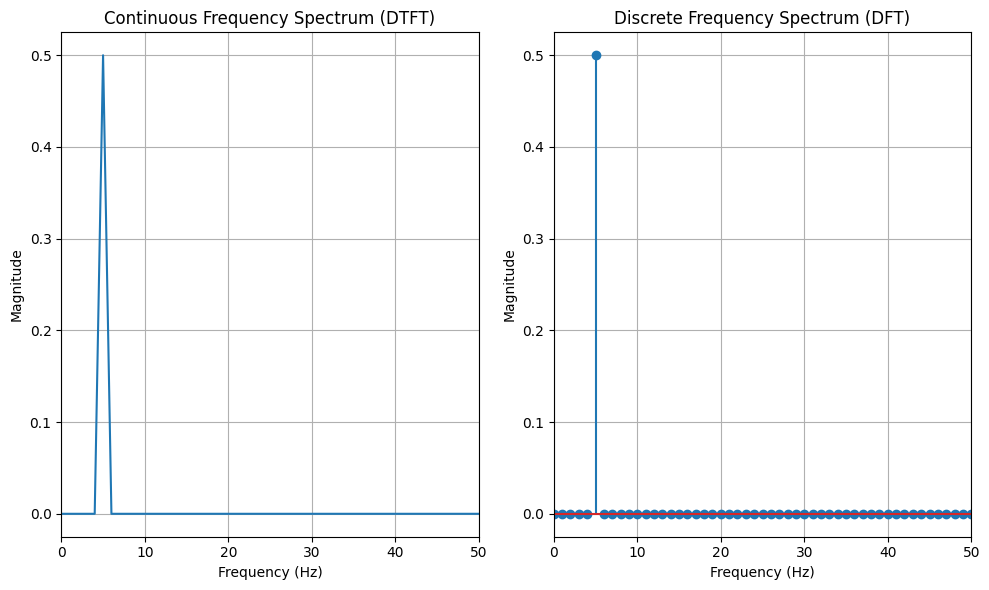

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parameters for the sine wave
f = 5       # Frequency of the sine wave (Hz)
fs = 1000   # Sampling frequency (Hz)
duration = 1  # Duration of the signal in seconds

# Generate the time vector and sine wave signal
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
sin_wave = np.sin(2 * np.pi * f * t)

# Compute DTFT (Continuous Spectrum) using FFT
n = len(sin_wave)
frequencies = np.linspace(0, fs, n)
dtft = np.abs(fft(sin_wave)) / n

# Compute DFT (Discrete Spectrum) using FFT
dft = fft(sin_wave)
frequencies_dft = fftfreq(n, 1/fs)

# Plot DTFT and DFT side by side with a limited x-axis range
plt.figure(figsize=(10, 6))

# Continuous Frequency Spectrum (DTFT)
plt.subplot(1, 2, 1)
plt.plot(frequencies[:n//2], dtft[:n//2])
plt.title('Continuous Frequency Spectrum (DTFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 50)  # Limiting x-axis from 0 to 50 Hz
plt.grid(True)

# Discrete Frequency Spectrum (DFT)
plt.subplot(1, 2, 2)
plt.stem(frequencies_dft[:n//2], np.abs(dft[:n//2]) / n, use_line_collection=True)
plt.title('Discrete Frequency Spectrum (DFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 50)  # Limiting x-axis from 0 to 50 Hz
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


here as we can see in the dft plot of continuos freq spectrum it analyzes how much of each frequency is present in the signal. shows us all possible frequencies in the signal.
It continuosly measures the frequncy of the signal.
Its is like measuring the speed of a car continuosly so you get the speed of the car at all times.

whereas in dft it measures only predefined frequency in a signal. it tells us if a pre determined frequnecy in present in the signal or not.
in the example of car the dft measures pre set speeds like if the at 5, 10, 15.

Both plots reflect the expected characteristics of the frequency spectrum of a pure sinusoidal signal.
DTFT shows a continuous spectrum, but due to the purity of the sine wave, the spectrum is very sparse with energy concentrated at the fundamental frequency (5 Hz).
DFT shows discrete spikes at the sampled frequencies, with the most significant peak corresponding to the sine wave's frequency (5 Hz). The rest are negligible, indicating that no other frequency components are present.

#Q2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector for 1 second

# Create two sinusoidal signals with different frequencies and amplitudes
signal1 = 1 * np.sin(2 * np.pi * 5 * t)     # 5 Hz sine wave, amplitude 1
signal2 = 0.5 * np.sin(2 * np.pi * 20 * t)  # 20 Hz sine wave, amplitude 0.5

# Composite signal (adding the two signals)
composite_signal = signal1 + signal2


Signal 1: Amplitude = 1, Frequency = 5 Hz

Signal 2: Amplitude = 0.5, Frequency = 20 Hz

here i am creating 2 signals with diff amplitudes and frequncy

then both the signals are combined together to create a composite signal.

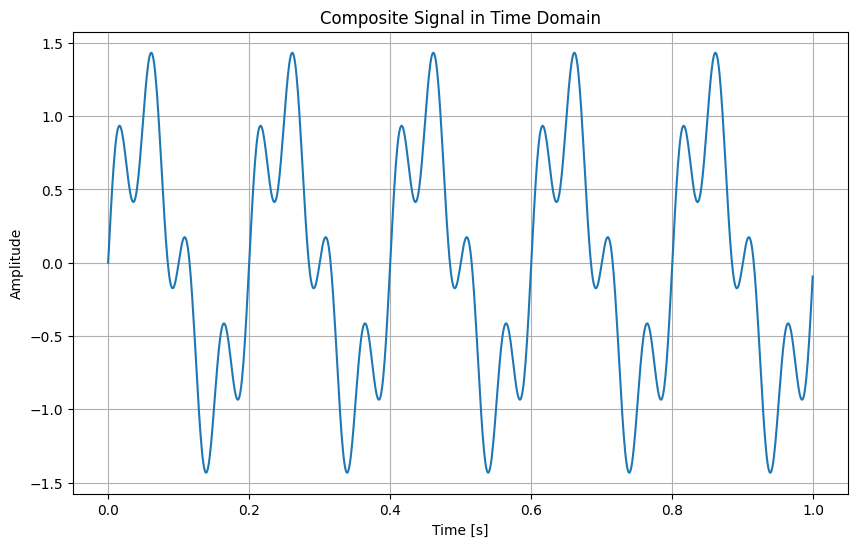

In [5]:
# Plot the time-domain waveform of the composite signal
plt.figure(figsize=(10, 6))
plt.plot(t, composite_signal)
plt.title('Composite Signal in Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


here we can see that the amplitude of the generated composite signal is 1.5 which is the added amplitude value of signal 1(1) and siganl 2 (0.5)

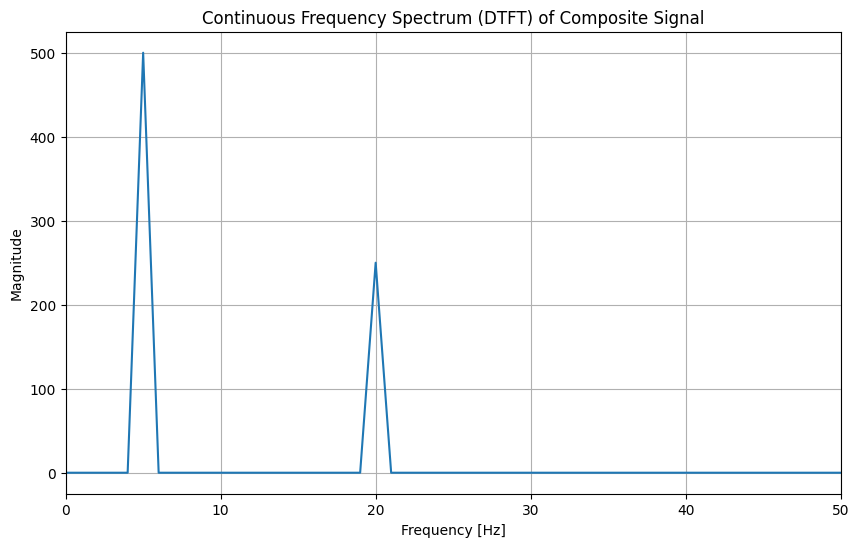

In [9]:
from scipy.fftpack import fft, fftfreq

# Compute the DTFT of the composite signal
composite_signal_dtft = fft(composite_signal)
frequencies = fftfreq(fs, 1/fs)

# Plot the continuous frequency spectrum (DTFT)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:fs // 2], np.abs(composite_signal_dtft[:fs // 2]))
plt.title('Continuous Frequency Spectrum (DTFT) of Composite Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 50)
plt.grid(True)
plt.show()


this dtft graph shows us the frequency distributions of both the composite signal. here we can see that the frequncy is spikinig at 5hz which is the freq of the first signal. then the line spiked at 20hz which is the frequency of the second signal.

here the dtft detects the signals freq at all time. giving us a triangle like structure. this shows us the freq slowly increasing and decresing.

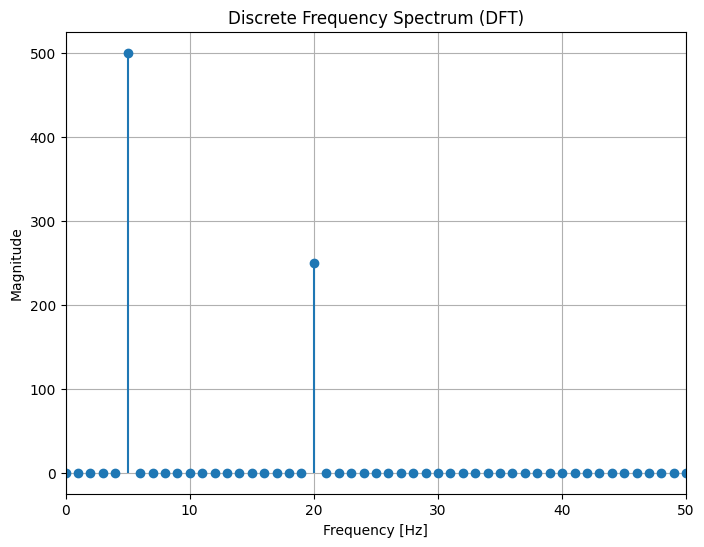

In [20]:
# Plot Discrete Frequency Spectrum (DFT)
plt.figure(figsize=(8, 6))
plt.stem(frequencies[:fs // 2], np.abs(composite_signal_dft[:fs // 2]), basefmt=" ")
plt.title('Discrete Frequency Spectrum (DFT)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 50)

plt.grid(True)
plt.show()


in this dft graph only the frequecny of our signals are detected whcih is 5 and 20 respectively. this is the function of discrete fourier transform graph.

thet is why we get a straight line only at 5 and 20hz

#Q3

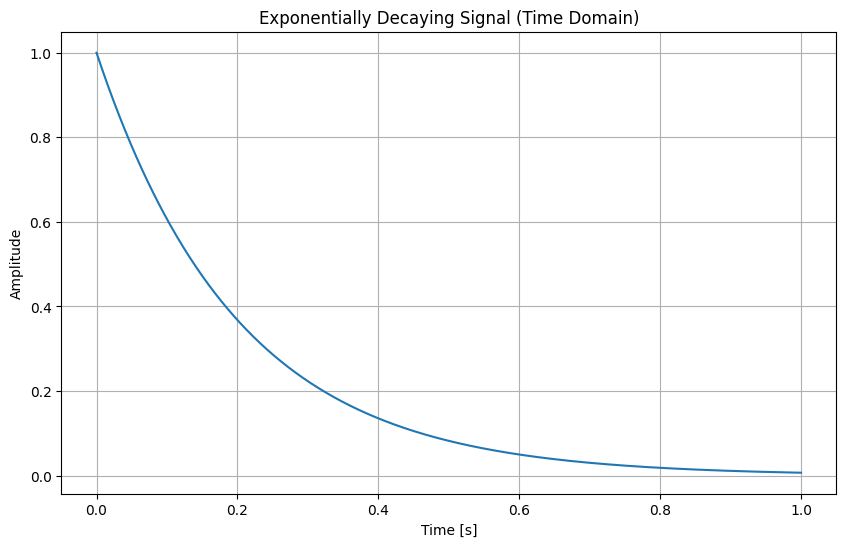

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the exponentially decaying signal
fs = 1000  # Sampling frequency (1000 samples/second)
t = np.linspace(0, 1, fs)  # Time vector for 1 second
alpha = 5  # Decay constant

# Exponentially decaying signal
exp_signal = np.exp(-alpha * t)

# 3(b) Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.plot(t, exp_signal)
plt.title('Exponentially Decaying Signal (Time Domain)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


this is the depiction of a decaying signal. which means that the signal has decreasing amplitude with time. the signal slowly fades away wiht time.

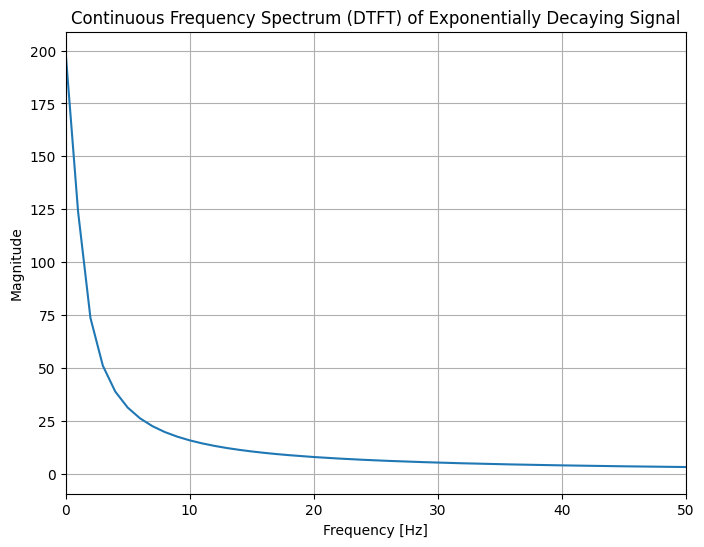

In [27]:
from scipy.fftpack import fft, fftfreq

# Compute DTFT (continuous frequency spectrum approximation using FFT)
exp_signal_dtft = fft(exp_signal)
frequencies = fftfreq(fs, 1/fs)

# Plot the continuous frequency spectrum (DTFT approximation)
plt.figure(figsize=(8, 6))
plt.plot(frequencies[:fs // 2], np.abs(exp_signal_dtft[:fs // 2]))
plt.title('Continuous Frequency Spectrum (DTFT) of Exponentially Decaying Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 50)

plt.show()


the dtft graph shows the decaying signals frequency. even though the signal is deacying the frequecies present in the signal is in very wide ranges.

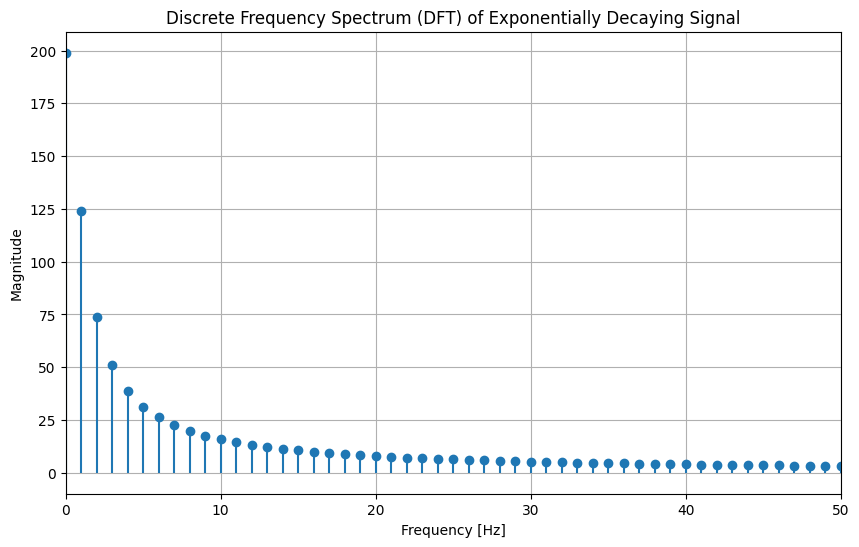

In [32]:
# Compute the DFT of the exponentially decaying signal
exp_signal_dft = fft(exp_signal)

# Plot the discrete frequency spectrum (DFT)
plt.figure(figsize=(10, 6))
plt.stem(frequencies[:fs // 2], np.abs(exp_signal_dft[:fs // 2]), basefmt=" ")
plt.title('Discrete Frequency Spectrum (DFT) of Exponentially Decaying Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 50)

plt.show()


this dft graph shows the pre determined frequency at regular intervals. instead of measuring freq continusily like the dtft graph dft graph only measure freq at intervals.

**Analyze the relationship between the time-domain waveform and the
frequency-domain representation.**

The faster the decay (higher 𝛼), the wider the frequency spread. Conversely, a slower decay (smaller 𝛼) will result in a more concentrated frequency spectrum, with most of the energy at low frequencies. This shows the trade-off between time-domain and frequency-domain localization (similar to the uncertainty principle in signal processing).

#Q4

the 4th question is basically same as the 3rd question

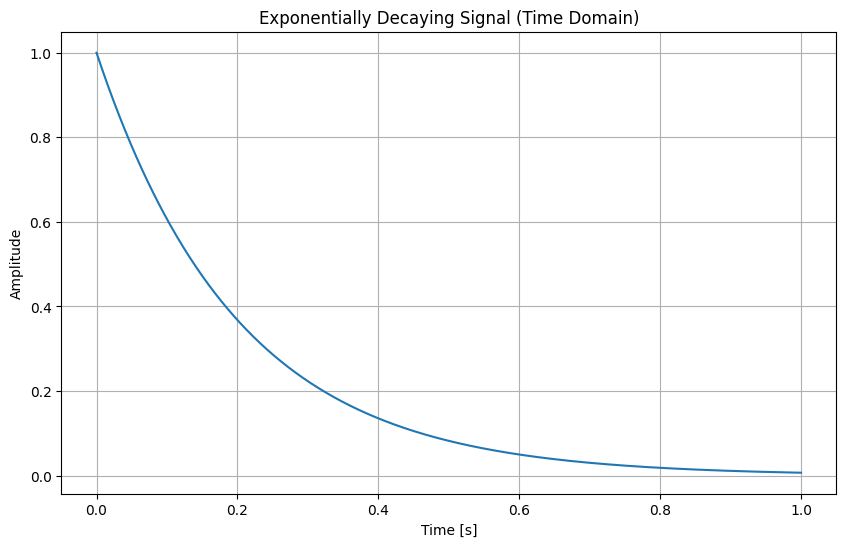

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Parameters for the exponentially decaying signal
fs = 1000  # Sampling frequency (1000 samples/second)
t = np.linspace(0, 1, fs)  # Time vector for 1 second
alpha = 5  # Decay constant

# Exponentially decaying signal
exp_signal = np.exp(-alpha * t)

# 4(b) Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.plot(t, exp_signal)
plt.title('Exponentially Decaying Signal (Time Domain)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


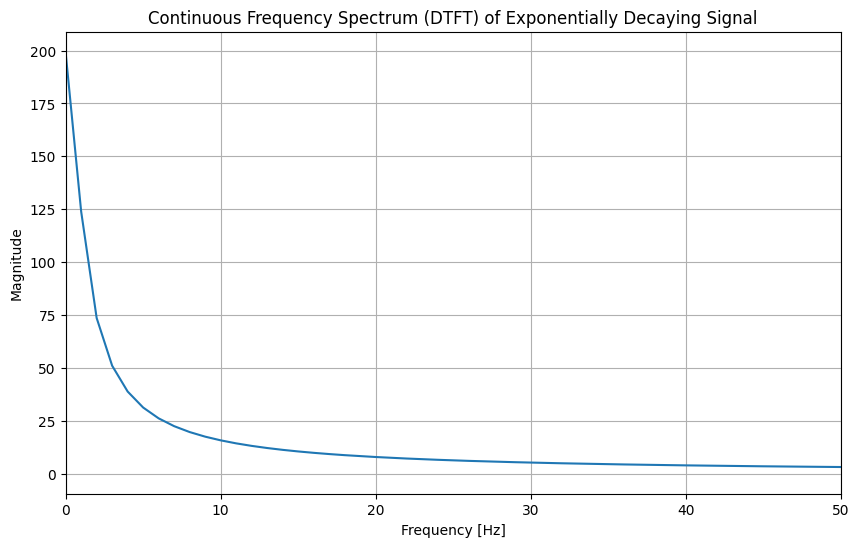

In [33]:
# Compute DTFT (continuous frequency spectrum approximation using FFT)
exp_signal_dtft = fft(exp_signal)
frequencies = fftfreq(fs, 1/fs)

# Plot the continuous frequency spectrum (DTFT approximation)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:fs // 2], np.abs(exp_signal_dtft[:fs // 2]))
plt.title('Continuous Frequency Spectrum (DTFT) of Exponentially Decaying Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 50)

plt.show()


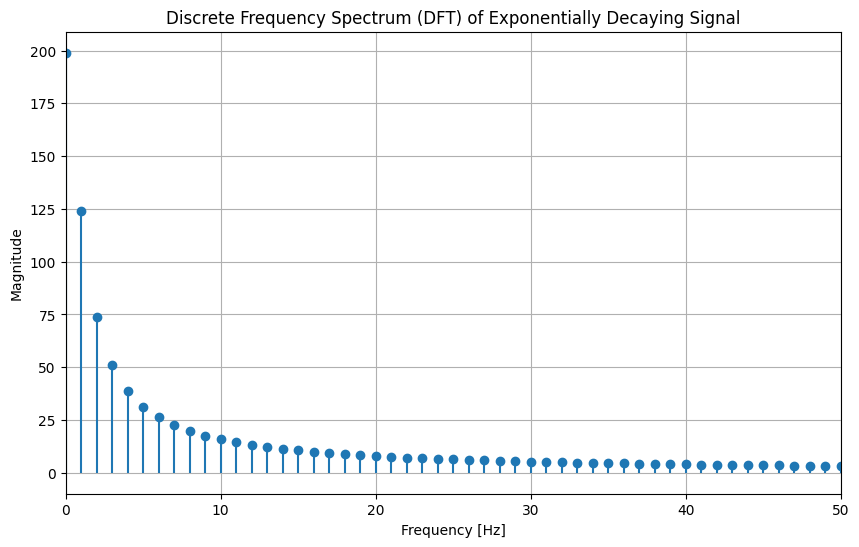

In [34]:
# Compute the DFT of the exponentially decaying signal
exp_signal_dft = fft(exp_signal)

# Plot the discrete frequency spectrum (DFT)
plt.figure(figsize=(10, 6))
plt.stem(frequencies[:fs // 2], np.abs(exp_signal_dft[:fs // 2]), basefmt=" ")
plt.title('Discrete Frequency Spectrum (DFT) of Exponentially Decaying Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 50)

plt.show()


In both the DTFT and DFT, the frequency-domain representation of an exponentially decaying signal reveals that the decay corresponds to a broad spectrum. The faster the signal decays (larger 𝛼), the broader the spectrum. Conversely, a slower decay (smaller 𝛼) results in a more concentrated frequency spectrum at low frequencies.

#Inference

Frequency-Domain Analysis Inference for Various Signals Using DTFT and DFT
Sinusoidal signals: For pure sinusoidal signals, both DTFT and DFT show sharp peaks in the frequency domain corresponding to the fundamental frequency and its harmonics (if any). A single frequency component dominates the spectrum.

Composite signals: When multiple sinusoids are combined, the DTFT and DFT reveal distinct peaks at each sinusoid's frequency. The composite signal's frequency spectrum contains multiple spikes at different frequencies.

Exponentially decaying signals: As we observed, the frequency spectrum of exponentially decaying signals is broader compared to pure sinusoids. This is because the exponential decay introduces a wide range of frequency components, indicating that decaying signals are not concentrated in a narrow band of frequencies.

Time-domain vs. Frequency-domain relationship: The time-domain waveform reflects how signals vary over time, while the frequency-domain representation shows the distribution of the signal's energy across different frequencies. In general, signals with more rapid changes (e.g., exponentially decaying signals) have broader spectra, while periodic signals (like sinusoids) have narrower spectra.

Conclusion:
Time-domain signals with rapid changes (e.g., exponential decay, impulses) correspond to broad, wide frequency spectra.
Periodic signals (e.g., pure sinusoids) correspond to narrow frequency spectra.
The choice between using DTFT (continuous) or DFT (discrete) depends on the application. DTFT gives a more accurate view of continuous frequencies, while DFT provides a discrete snapshot suitable for practical implementations like digital signal processing.